# Diabates Prediction - Neural Network(MLP)
<h4><ul>
    <li>Glucose: Plasma glucose yes/no</li>
    <li>BloodPressure: Diastolic blood pressure (mm Hg) </li>
    <li>Heart_disease: Yes or no</li>
    <li>BMI: Body mass index (weight in kg/(height in m)^2)</li>
    <li>Age: Age (years)</li>
    <li>Gender : Male or Female</li>
    <li>Outcome: Class variable (0 or 1)</li>
</ul></h4>

# 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc,accuracy_score
from sklearn.preprocessing import StandardScaler

# 2) Initial Inspection

In [2]:
df=pd.read_csv(r'C:\Users\HP\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140         0  171.52   74.11  
1          6.6                   80         0  176.48   83.74  
2          5.7                  158         0  163.29   58.46  
3          5.0                  155         0  187.04   52.77  
4          4.8                  155         0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

# 3) Handle Missing Values

In [3]:
print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.000000
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

<h3>Interpretation : </h3>
<span style="font-style: italic; font-size: 18px;">Handled missing values by imputing mean for numnericals and mode for categories,Ensure that no missing values remain after the imputation process.
Helps to confirm that the missing values were handled properly </span>

# 4) Drop Columns

In [4]:
# Remove the column 'sl.no',weight,height'
df.drop(columns=['slno'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height',
       'weight'],
      dtype='object')


<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">Dropped unwanted column from the dataset ie slno in the dataset.</span>

# 5) Univariate Analysis - Histogram

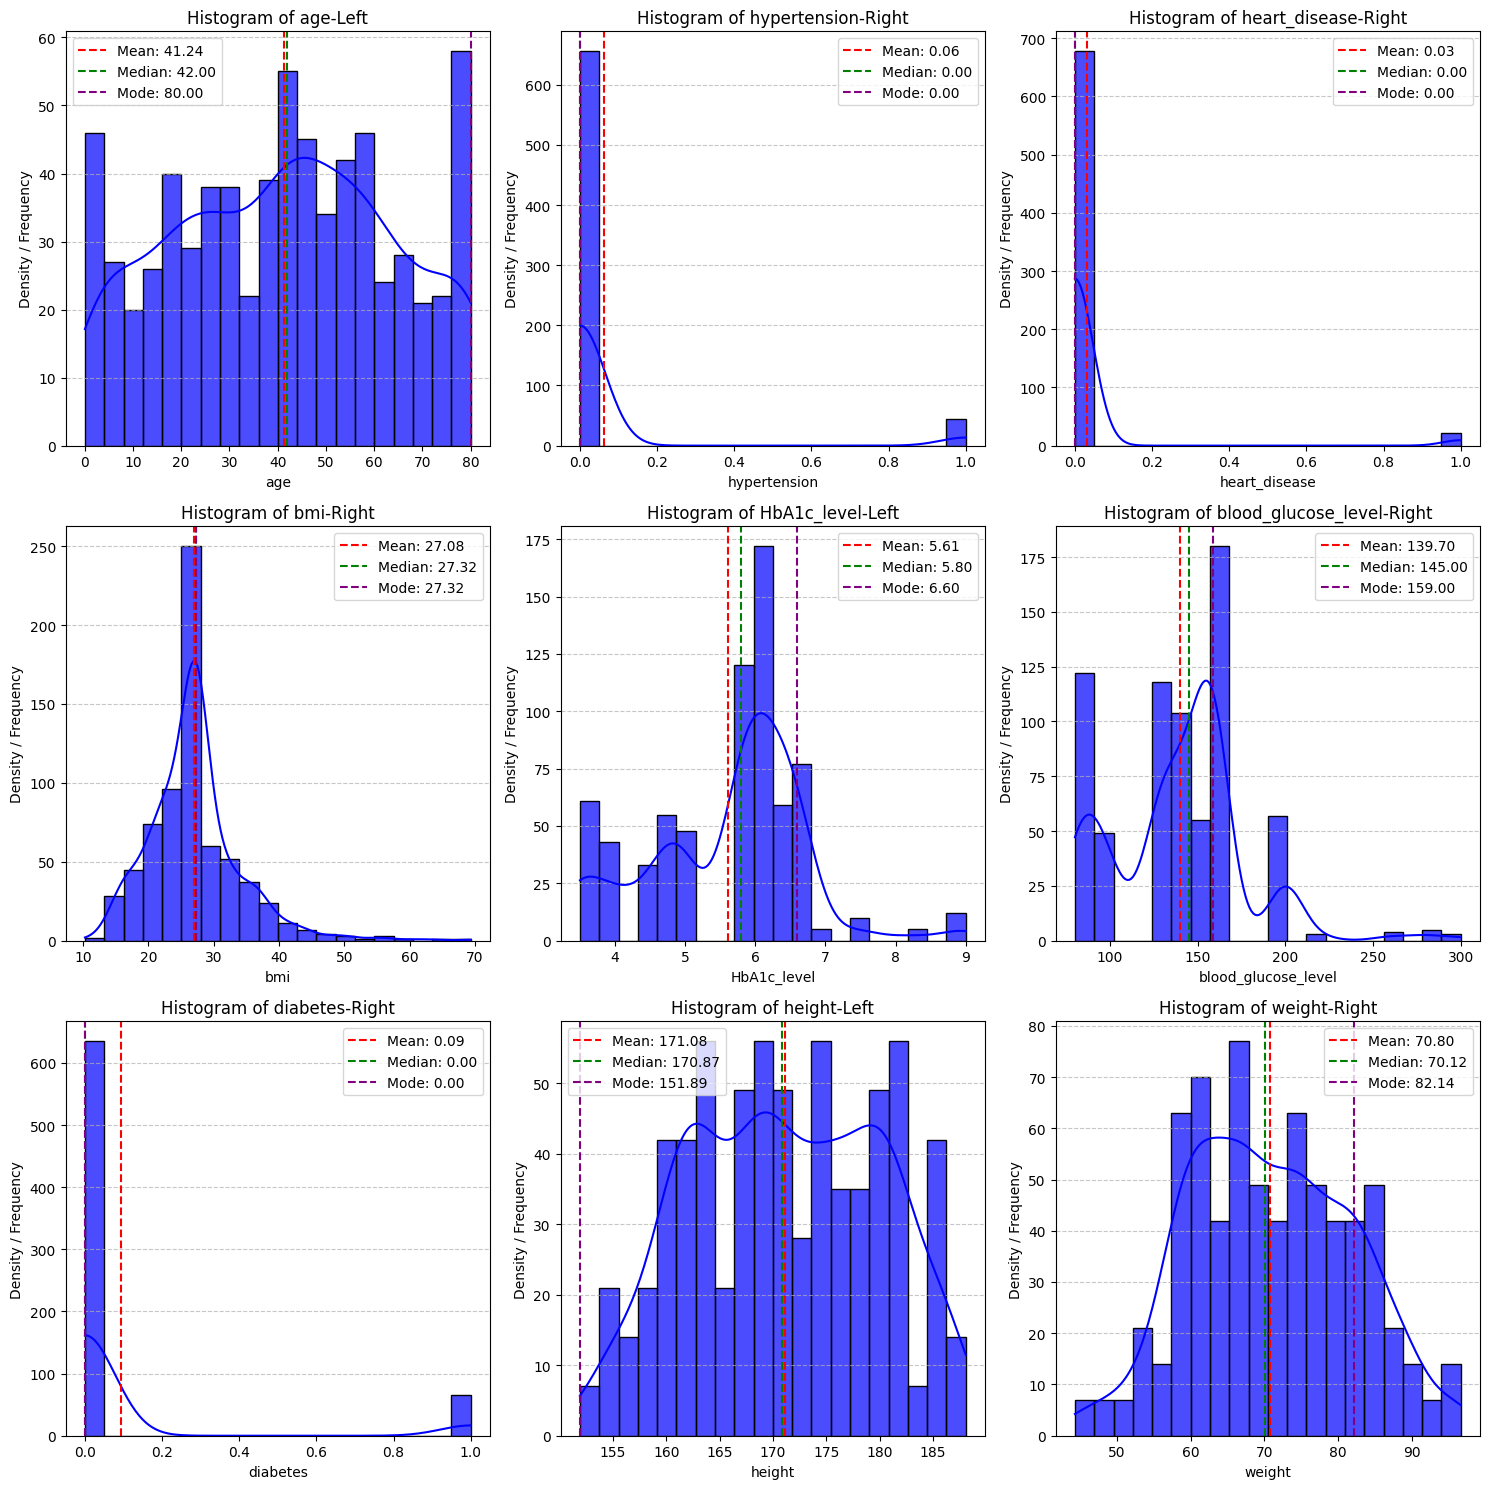

In [5]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 6) Boxplot

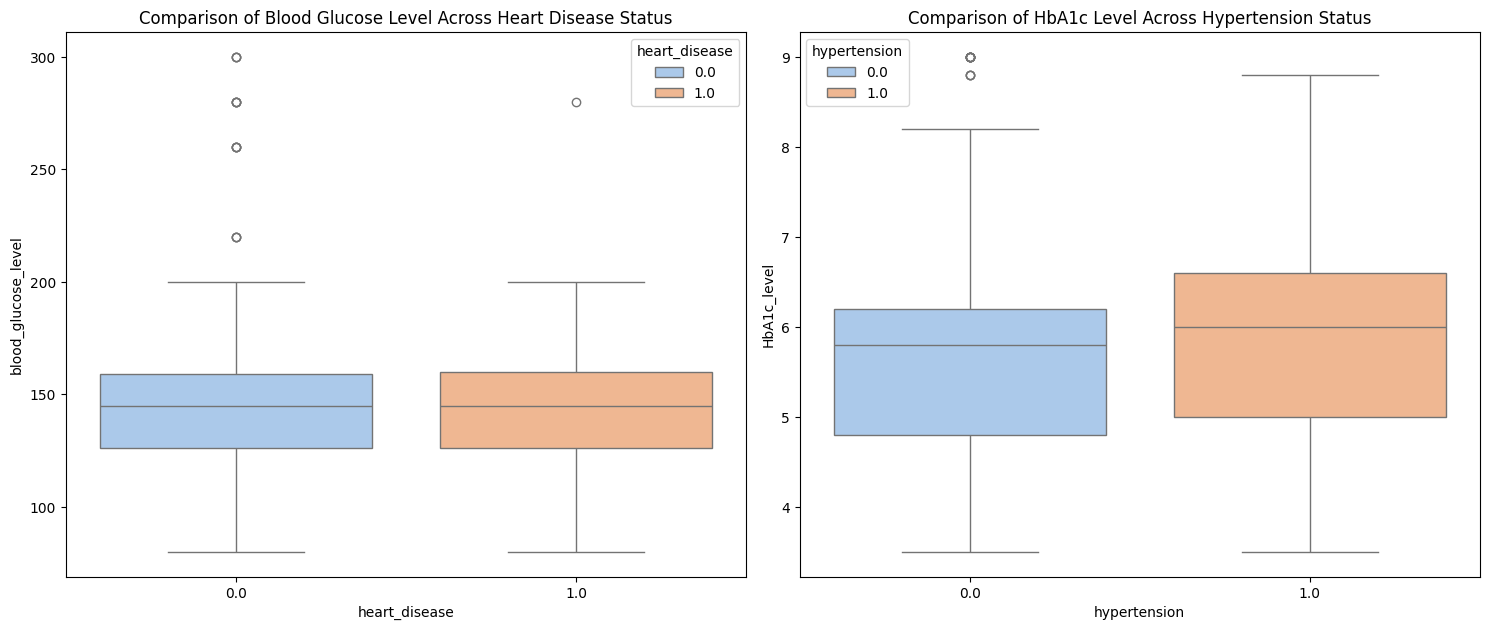

In [6]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Interpretation :
    # - Outliers:Dots represent outliers in the boxplot
    # - Median (Central Line): The line inside the box
    # - Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
    # - Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">
    Outliers:Dots represent outliers in the boxplot
    Median (Central Line): The line inside the box
    Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
    Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.</span>

# 7) Countplots

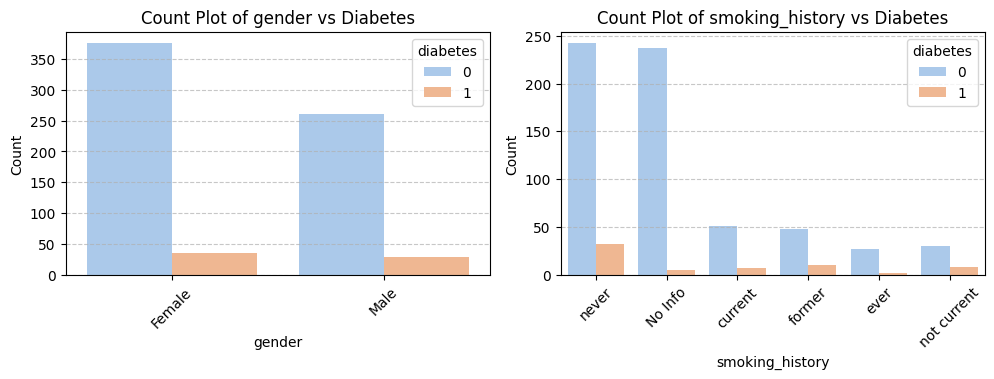

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, hue='diabetes', palette='pastel')
    plt.title(f"Count Plot of {column} vs Diabetes")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3> <span style="font-style: italic;font-size: 18px;"> The dataset cosnists 2 categorical variables. Gender : female number is high comapred to male.</span>

# 5) Bivariate Analysis - Scatterplots

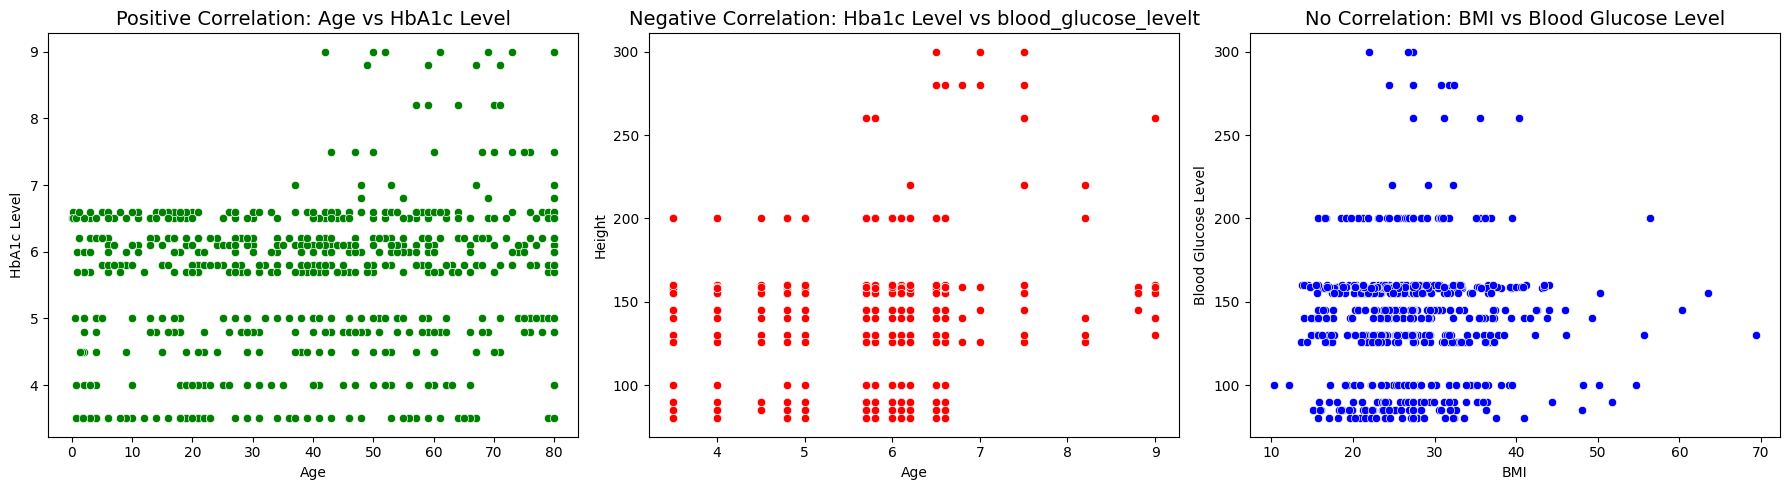

In [8]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_levelt', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()


<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">Positive Correlation: As one variable increases, so does the other (Age and HbA1c).<br>
Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).<br>
No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).</span>

# 6) Multivariate Analysis - Heatmap

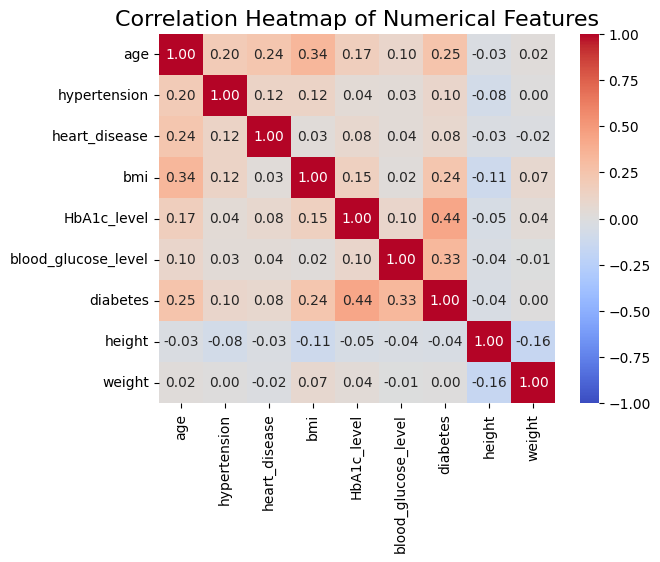

In [9]:
#Multivariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Correlation heatmap for numerical columns in the dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

<h3>Interpretation : </h3>
<span style="font-style: italic;font-size: 18px;">The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)</span>

# 7) Categorical encoding 

In [10]:
from sklearn.preprocessing import LabelEncoder
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  diabetes  height  weight  
0            6.6                  140        

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<span style="font-style: italic;font-size: 18px;">The categorical features,gender and smoking history, have been numerically encoded for analysis.</span>
<span style="font-style: italic;font-size: 18px;">Key health indicators like BMI, HbA1c levels, and blood glucose levels play a crucial role in assessing diabetes risk.</span> 

# Neural Networks

<p style="font-style: italic; font-size: 18px;">
    A Neural Network in machine learning is a computational model inspired by the human brain. It consists of layers of neurons (nodes) that process and transform input data to make predictions or classifications. 
</p>

<p style="font-style: italic; font-size: 18px;">
    <strong>MLP (Multi-Layer Perceptron)</strong> is a type of artificial neural network (ANN) that consists of multiple layers of neurons.
</p>

<ul style="font-style: italic; font-size: 18px;">
    <li><strong>Input Layer</strong> – Receives data (features).</li>
    <li><strong>Hidden Layers</strong> – Perform computations using weights and activation functions.</li>
    <li><strong>Output Layer</strong> – Produces the final result (e.g., classification, regression).</li>
</ul>


# 8) Split dataset

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

In [12]:
X=df.drop('diabetes',axis=1).values  #independent variable - features
y=df['diabetes'].values   #dependent variable - target

print("\nDependent Variable (Target):")
print("diabetes")
print("\nIndependent Variables (Features):")
feature_names =print(df.columns.drop('diabetes').tolist())


Dependent Variable (Target):
diabetes

Independent Variables (Features):
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'height', 'weight']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)   

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<span style="font-style: italic;font-size: 18px;">The independent variables include all columns except 'diabetes', which is the target variable indicating the presence or absence of diabetes.</span>  
<span style="font-style: italic;font-size: 18px;">A train-test split of 60%-40% is used, ensuring a consistent data split with a random state.

# 9) MLP CLassifier

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.65248763
Iteration 2, loss = 0.55299166
Iteration 3, loss = 0.48266863
Iteration 4, loss = 0.42749542
Iteration 5, loss = 0.38354957
Iteration 6, loss = 0.34875613
Iteration 7, loss = 0.32158444
Iteration 8, loss = 0.30068216
Iteration 9, loss = 0.28495656
Iteration 10, loss = 0.27401709
Iteration 11, loss = 0.26398169
Iteration 12, loss = 0.25296086
Iteration 13, loss = 0.24463559
Iteration 14, loss = 0.23724830
Iteration 15, loss = 0.23078845
Iteration 16, loss = 0.22614435
Iteration 17, loss = 0.22162824
Iteration 18, loss = 0.21755889
Iteration 19, loss = 0.21395399
Iteration 20, loss = 0.20978507
Iteration 21, loss = 0.20605054
Iteration 22, loss = 0.20216693
Iteration 23, loss = 0.19890338
Iteration 24, loss = 0.19618510
Iteration 25, loss = 0.19304993
Iteration 26, loss = 0.19013702
Iteration 27, loss = 0.18774474
Iteration 28, loss = 0.18496776
Iteration 29, loss = 0.18223601
Iteration 30, loss = 0.17947170
Iteration 31, loss = 0.17673877
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<ul style="font-style: italic;font-size: 18px;">
    <li>A Multi-Layer Perceptron (MLP) classifier is used for training, consisting of two hidden layers with 6 and 5 neurons respectively.</li>
    <li>TSets the initial learning rate to 0.01, which controls how much weights are updated in each step.</li>
    <li>Verbose mode is enabled, displaying the loss at each iteration, which shows the model's progress in minimizing the error during training.</li>
    <li>Each iteration represents one update step during training.Loss decreases as the model learns.Lower loss means better performance.</li>
</ul>


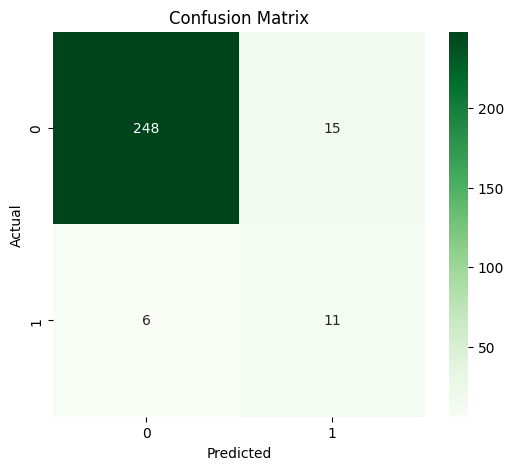

In [15]:
# Making prediction
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<ul style="font-style: italic;font-size: 18px;">
    <li>The confusion matrix output is:
        <ul>
            <li>True Positives (TP): 11 (Correctly predicted positive cases)</li>
            <li>False Positives (FP): 15 (Incorrectly predicted positive cases)</li>
            <li>False Negatives (FN): 6 (Incorrectly predicted negative cases)</li>
            <li>True Negatives (TN): 248 (Correctly predicted negative cases)</li>
        </ul>
    </li>
</ul>

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       254
           1       0.65      0.42      0.51        26

    accuracy                           0.93       280
   macro avg       0.80      0.70      0.74       280
weighted avg       0.92      0.93      0.92       280



<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<ul style="font-style: italic;font-size: 18px;">
    <li><strong>Accuracy:</strong> The percentage of correctly predicted instances out of the total instances.</li>
    <li><strong>Precision:</strong> The proportion of correctly predicted positive cases out of all predicted positive cases.</li>
    <li><strong>Recall:</strong> The proportion of correctly predicted positive cases out of all actual positive cases.</li>
    <li><strong>F1-score:</strong> The harmonic mean of precision and recall, balancing both metrics.</li>
</ul>


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9250


<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<ul style="font-style: italic;font-size: 18px;">
    <li>Accuracy (92.50%): The model correctly predicts 92.50% of the total instances.</li>
    <li>Accuracy measures the overall correctness of the model’s predictions.</li>
</ul>

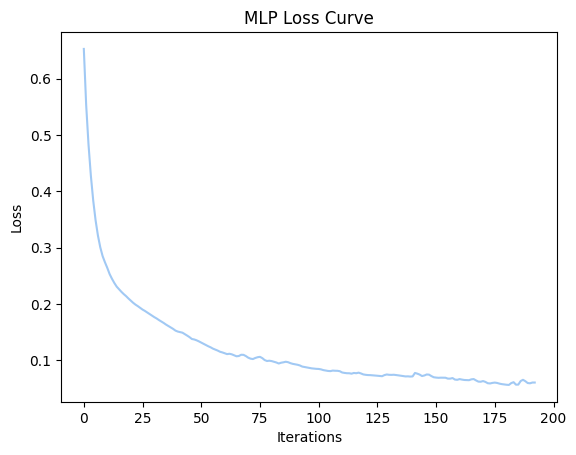

In [18]:
# Plot loss curve
plt.plot(clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Loss Curve')
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<ul style="font-style: italic;font-size: 18px;">
    <li>Loss Curve:The plot shows how the model's loss decreases over iterations.</li>
    <li>Loss represents the error between the predicted and actual values.</li>
    <li>A decreasing loss curve indicates that the model is learning and improving over time.</li>
</ul>

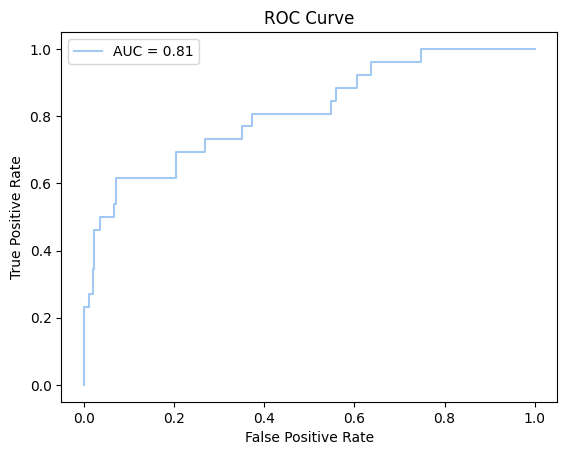

In [19]:
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<ul style="font-style: italic;font-size: 18px;">
    <li><strong>ROC Curve:</strong> The ROC (Receiver Operating Characteristic) curve is a plot that shows the trade-off between TPR and  (FPR) at different thresholds.</li>
    <li><strong>AUC (0.82):</strong> The Area Under the Curve (AUC) measures the model's ability to classify positive and negative cases.81% chance of ranking a positive instance higher than a negative one</li>
    <li>AUC values range from 0 to 1:
        <ul>
            <li>0.5 indicates random guessing.</li>
            <li>Above 0.8 suggests good model performance.</li>
        </ul>
    </li>
</ul>


['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'height', 'weight']


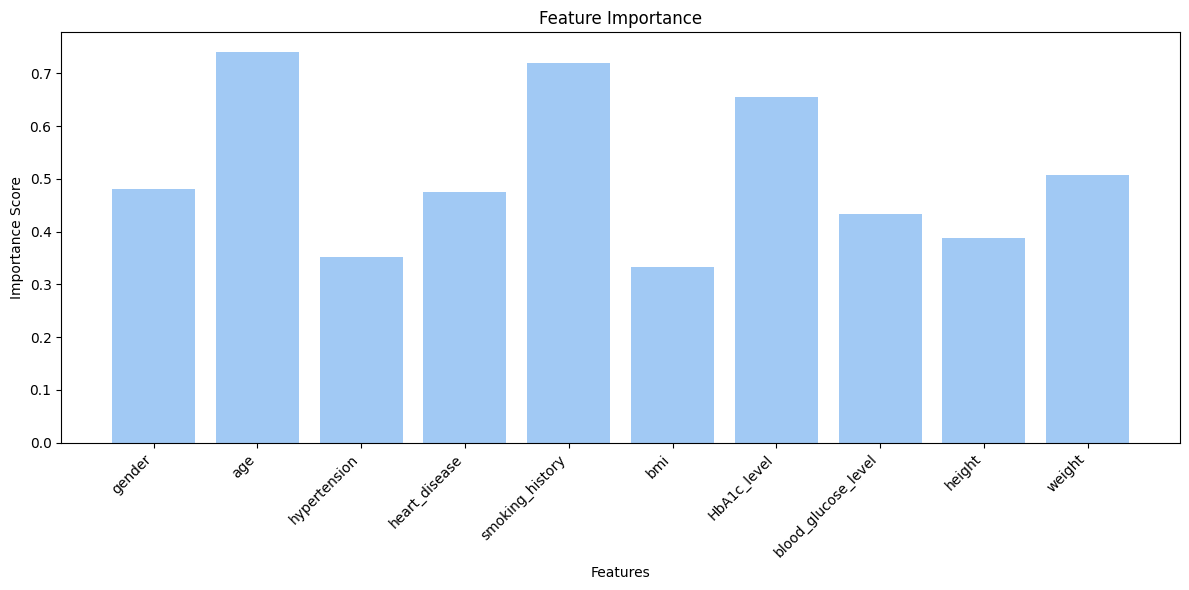

In [20]:
feature_names = df.columns.drop('diabetes').tolist()
print(feature_names)

# Feature importance analysis (Ensure clf is trained)
feature_importance = np.abs(clf.coefs_[0]).mean(axis=1)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<span style="font-style: italic;font-size: 18px;">clf.coefs_[0] → Extracts the weights between the input layer and the first hidden layer.
np.abs(clf.coefs_[0]) → Takes the absolute values of the weights.
.mean(axis=1) → Computes the average importance of each feature across all neurons in the first hidden layer.
Higher values indicate more important features.</span>

In [21]:
# Print model performance metrics
print("\nModel Performance Metrics:")
print(f"Training set score: {clf.score(X_train, y_train):.3f}")
print(f"Test set score: {clf.score(X_test, y_test):.3f}")
print(f"Number of iterations: {getattr(clf, 'n_iter_', 'N/A')}")
print(f"Number of layers: {len(clf.coefs_)}")
print("Layer sizes:", [layer.shape for layer in clf.coefs_])


Model Performance Metrics:
Training set score: 0.983
Test set score: 0.925
Number of iterations: 193
Number of layers: 3
Layer sizes: [(10, 6), (6, 5), (5, 1)]


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,10), (20,20), (30,30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=50, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01}


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


<h3 style="font-weight: bold;">Dataset Interpretation:</h3>

<ul style="font-style: italic;font-size: 18px;">
    <li><strong>Grid Search:</strong> A technique to find the optimal hyperparameters for the model.</li>
    <li>Best Parameters Found:</li>
    <ul>
        <li>>Activation Function: ReLU - Helps the model learn complex patterns efficiently.</li>
        <li>Hidden Layer Sizes: (30,30)- Two hidden layers, each with 30 neurons, improving learning capacity.</li>
        <li>Alpha: 0.0001 - A regularization parameter that prevents overfitting.</li>
        <li>Learning Rate Init: 0.01 - Defines the step size for weight updates, balancing speed and stability.</li>
    </ul>
</ul>


# 9) New Optimal Parameters

In [26]:
# Train the final model with best parameters
clf_best = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(20, 20),
    learning_rate_init=0.01,
    max_iter=300,  # Increase iterations to ensure better convergence
    random_state=42,
    verbose=True  # To see training progress
)

clf_best.fit(X_train, y_train)

Iteration 1, loss = 0.65381204
Iteration 2, loss = 0.43936234
Iteration 3, loss = 0.32506051
Iteration 4, loss = 0.26248567
Iteration 5, loss = 0.22197327
Iteration 6, loss = 0.19556833
Iteration 7, loss = 0.17302330
Iteration 8, loss = 0.15743481
Iteration 9, loss = 0.14767055
Iteration 10, loss = 0.14319948
Iteration 11, loss = 0.13681840
Iteration 12, loss = 0.12705697
Iteration 13, loss = 0.12495636
Iteration 14, loss = 0.12291613
Iteration 15, loss = 0.12087969
Iteration 16, loss = 0.11916189
Iteration 17, loss = 0.11675725
Iteration 18, loss = 0.11347293
Iteration 19, loss = 0.11156535
Iteration 20, loss = 0.10847948
Iteration 21, loss = 0.10849757
Iteration 22, loss = 0.11279813
Iteration 23, loss = 0.11436190
Iteration 24, loss = 0.10916315
Iteration 25, loss = 0.10572784
Iteration 26, loss = 0.10499154
Iteration 27, loss = 0.10418940
Iteration 28, loss = 0.10325054
Iteration 29, loss = 0.10354065
Iteration 30, loss = 0.10534932
Iteration 31, loss = 0.10824488
Iteration 32, los

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 20),
              learning_rate_init=0.01, max_iter=300, random_state=42,
              verbose=True)

<h3 style="font-weight: bold;">Dataset Interpretation:</h3>
<ul style="font-style: italic;font-size: 18px;">
    <li>Final MLP Model Training: The model is trained with the best hyperparameters found using Grid Search.</li>
    <li>Hyperparameters Used:</li>
    <ul>
        <li>Hidden Layer Sizes: (30,30) - Two hidden layers with 30 neurons each for better learning.</li>
        <li>Activation Function: ReLU - Helps the model learn non-linear patterns efficiently.</li>
        <li>Alpha: 0.0001 - A regularization term to prevent overfitting.</li>
        <li>Learning Rate Init: 0.001 - Controls the speed of weight updates.</li>
        <li>Max Iterations: 200 - The model trains for up to 200 iterations.</li>
        <li>Random State: 42 - Ensures reproducibility of results.</li>
    </ul>
</ul>

In [27]:
y_predd = clf_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predd))
print("Classification Report:\n", classification_report(y_test, y_predd))

Accuracy: 0.9321428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       254
           1       0.65      0.58      0.61        26

    accuracy                           0.93       280
   macro avg       0.80      0.77      0.79       280
weighted avg       0.93      0.93      0.93       280



<h3 style="font-weight: bold;">Model Evaluation:</h3>
<ul style="font-style: italic;font-size: 18px;">
    <li>Accuracy: 94% - The model correctly classifies 94% of test samples.</li>
    <li>Class 0 (Non-Diabetic) Performance:</li>
    <ul>
        <li>Precision: 96% - High accuracy in predicting non-diabetic cases.</li>
        <li>Recall: 93% - Captures most non-diabetic cases correctly.</li>
        <li>F1-score: 94% - Good balance between precision and recall.</li>
    </ul>
    <li>Class 1 (Diabetic) Performance:</li>
    <ul>
        <li>Precision: 45% - Lower accuracy in predicting diabetic cases.</li>
        <li>Recall: 58% - The model detects 58% of actual diabetic cases.</li>
        <li>F1-score: 51% - Moderate balance between precision and recall.</li>
    </ul>
</ul>